# <center>Nettoyage et transformation des données Projet fil rouge<center>
    
Dans le cadre du projet, la première étape que l'on se fixe sera le nettoyage des données et leur transformation en vue de leur exploitation. 
Nous avons commencé par effectuer une analyse exploratoire et une analyse des objets étudiés. 

**Liste des transformations des données dans l'ordre :**
- passage des noms de gènes en index dans logratio et pval
- estimation des pvalues manquantes dans datapval
- Construction d'une matrice d'expression discrète (codée en -1, 0, 1) et 
- Construction d'une matrice d'expression ne contenant que les informations relatives aux gènes communs aux 3 
dataset. 
- tri des datasets finaux dans l'ordre alphabétique pour que l'ordre soit le même dans les deux

In [2]:
#importation des bibliothèques 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# importation des données 

data_logratio = pd.read_csv("data/LOG_RATIO_GEM2NET_UNIQLINK", sep='\t')
data_pval = pd.read_csv("data/BONF_PVAL_GEM2NET_UNIQLINK", sep='\t')
data_PLM = pd.read_csv("data/matricePLM_genes.txt", sep="\t")

## Informations sur les dataframes

### Dimensions des dataframes

In [4]:
# Forme des données 
print("Dimensions de data_logratio : ", data_logratio.shape)
print("Dimensions de data_pval : ", data_pval.shape)
print("Dimensions de data_PLM : ", data_PLM.shape)

Dimensions de data_logratio :  (17543, 388)
Dimensions de data_pval :  (17543, 388)
Dimensions de data_PLM :  (13854, 178)


3 dataframes, dont 1 de dimensions différentes à celles des 2 autres. Nombre de colonnes diffère, ce qui est normal, mais nombre de gènes devrait être pareil, donc il va y avoir une étape d'analyse des données pour détecter les gènes communs aux trois dataframes, les seuls qui pourront être utilisés dans le cadre du projet.  

In [5]:
# affichage des premières variables dataframe
print("Premières lignes de data_logratio : \n", data_logratio.head)
print("Premières lignes de data_pval : \n", data_pval.head)
print("Premières lignes de data_PLM : \n", data_PLM.head)

Premières lignes de data_logratio : 
 <bound method NDFrame.head of       Unnamed: 0    1101    1104      29      30    1977    1973    1980  \
0      AT3G32130 -0.0063 -0.0319 -0.0535  0.0539 -0.0541  0.1612  0.1375   
1      AT5G53730  0.0247  0.0287  0.0691  0.3603  1.0438  0.2848 -0.1228   
2      AT2G19210  0.1895  0.1205 -0.0512  0.0279 -0.1157 -0.0385  0.0287   
3      AT1G07530 -0.2080  0.5245  1.0013  2.1038  0.6395  0.6406  0.1282   
4      AT1G03190 -0.1249  0.0234  0.0858  0.0602 -0.0499  0.0002 -0.1022   
...          ...     ...     ...     ...     ...     ...     ...     ...   
17538  AT1G30640 -0.0700  0.1021 -0.0042 -0.0584  0.1292  0.0087  0.0016   
17539  AT1G04440 -0.0222  0.0183  0.0009 -0.0183  0.3002  0.1409 -0.1079   
17540  AT3G33009 -0.1653  0.1816 -0.1398  0.1349 -0.0470 -0.1024 -0.1091   
17541  AT3G19323 -0.0701  0.0792 -0.0177 -0.0464 -0.0415 -0.1061  0.0631   
17542  AT2G17280  0.0794 -0.0722  0.0373 -0.1013  0.0137  0.0845 -0.1697   

         1976    19

Premier point de vigilance : nom des gènes dans la 1ere colonne pour logratio et pval mais dans l'index pour PLM. On rectifie ça : 

In [6]:
data_logratio.index , data_pval.index = data_logratio['Unnamed: 0'], data_pval['Unnamed: 0']
data_logratio = data_logratio.drop(columns=['Unnamed: 0'])
data_pval = data_pval.drop(columns=['Unnamed: 0'])

In [7]:
# Est ce que les lignes et colonnes sont identiques et dans le même ordre entre data_pvalue et data_logratio ? 
print("Colonnes de data_pval et data_logratio identiques et dans le même ordre : ", np.unique(data_pval.columns == data_logratio.columns))
print("Lignes de data_pval et data_logratio identiques et dans le même ordre : ", np.unique(data_pval.index == data_logratio.index))

Colonnes de data_pval et data_logratio identiques et dans le même ordre :  [ True]
Lignes de data_pval et data_logratio identiques et dans le même ordre :  [ True]


Bien dans le même ordre, on peut donc faire des concaténations ou des comparaisons ligne à ligne ou colonne à colonne entre les deux sans se planter. 

### Exploration des valeurs manquantes

#### Général

In [8]:
nombre_na_logratio = data_logratio.isna().values.sum() 
nombre_na_pval = data_pval.isna().values.sum()
nombre_na_PLM = data_PLM.isna().values.sum()

print("Nombre de NA dans data_logratio : ", nombre_na_logratio, "\n"
     "Nombre de NA dans data_pval : ", nombre_na_pval, "\n"
     "Nombre de NA dans data_PLM : ", nombre_na_PLM, "\n")

Nombre de NA dans data_logratio :  523 
Nombre de NA dans data_pval :  34957 
Nombre de NA dans data_PLM :  0 



On a : aucune valeur manquante dans data_PLM, peu de valeurs manquantes dans data_logratio et beaucoup de valeurs manquantes dans data_pval. 
Regardons plus précisément où celles ci sont présentes. 

#### Répartition

##### Par colonnes

Text(0.5, 1.0, 'Nombre de Na par colonnes de data_pval')

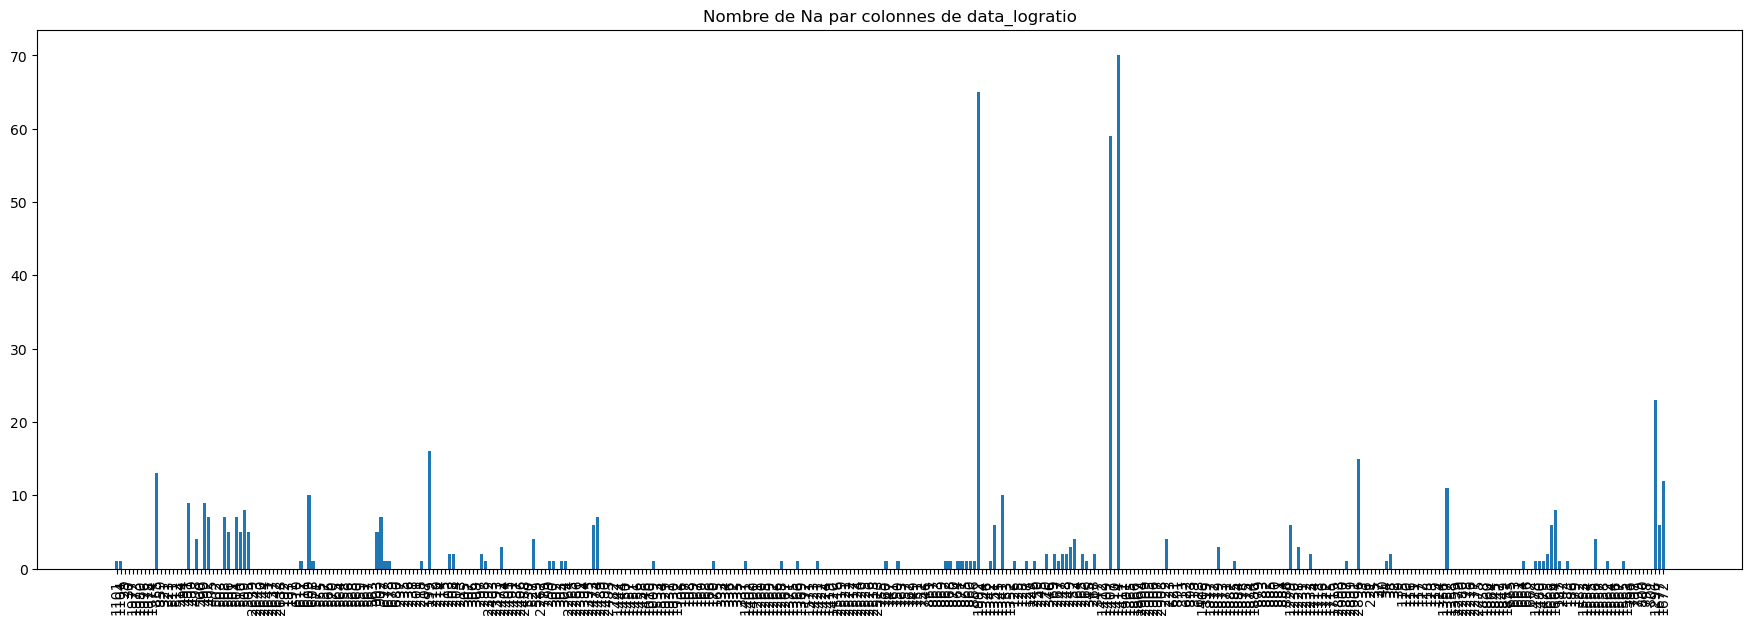

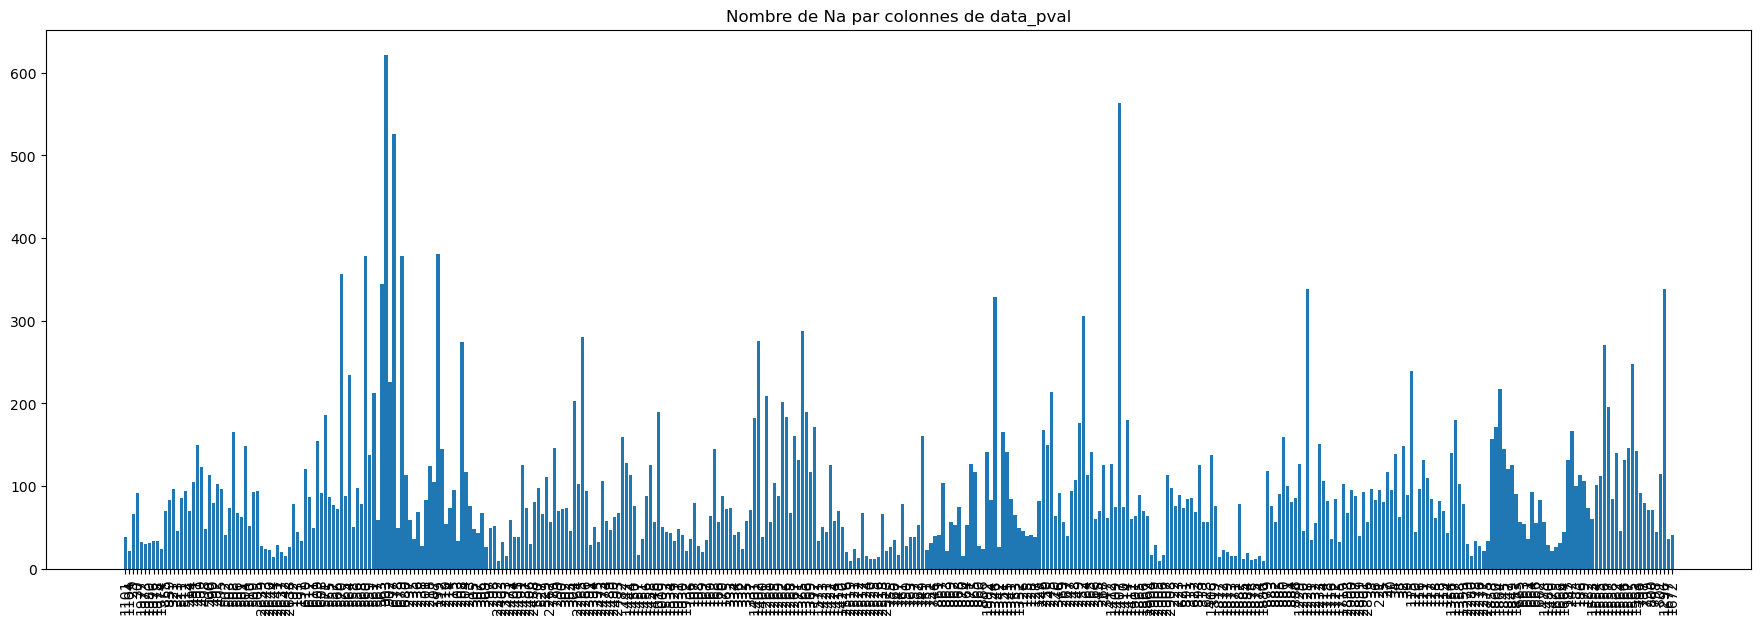

In [9]:
na_logratio_colonnes = data_logratio.isna().sum(axis=0)
plt.figure(figsize=(22,7))
plt.bar(na_logratio_colonnes.index, na_logratio_colonnes)
plt.xticks(rotation=90)
plt.title("Nombre de Na par colonnes de data_logratio")

na_pval_colonnes = data_pval.isna().sum(axis=0)
plt.figure(figsize=(22,7))
plt.bar(na_pval_colonnes.index, na_pval_colonnes)
plt.xticks(rotation=90)
plt.title("Nombre de Na par colonnes de data_pval")

Bien que certaines colonnes présentent un nombre assez anormalement élevé de NA, celles ci sont réparties entre toutes les colonnes et leur nombre dans une colonne de dépasse jamais les 3.5% (620/174543). 
Nous n'éliminerons donc pas de colonnes pour effectuer la suite des analyses. 

##### Par lignes

Text(0, 0.5, 'Nombre de lignes concernées')

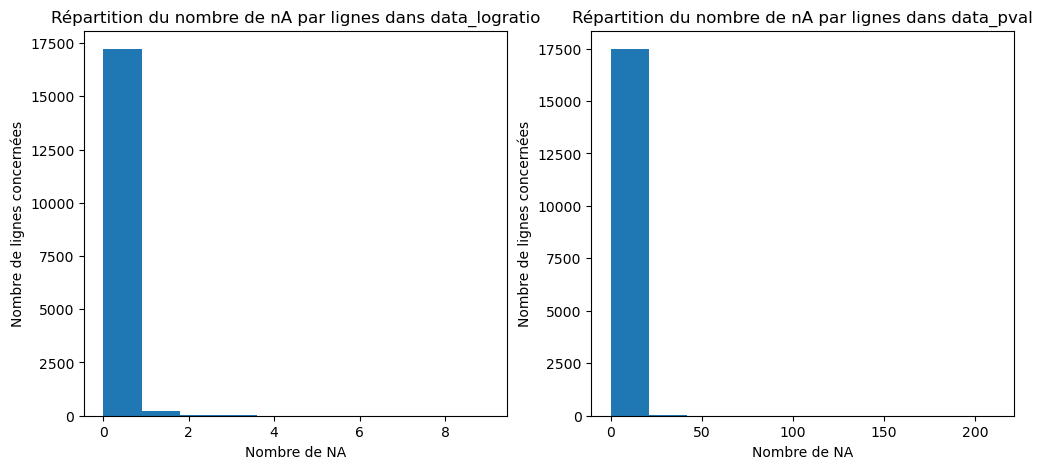

In [10]:
plt.figure(figsize=(12,5))

na_logratio_lignes = data_logratio.isna().sum(axis=1)
plt.subplot(1,2,1)
plt.hist(na_logratio_lignes)
plt.title("Répartition du nombre de nA par lignes dans data_logratio")
plt.xlabel("Nombre de NA")
plt.ylabel("Nombre de lignes concernées")

na_pval_lignes = data_pval.isna().sum(axis=1)
plt.subplot(1,2,2)
plt.hist(na_pval_lignes)
plt.title("Répartition du nombre de nA par lignes dans data_pval")
plt.xlabel("Nombre de NA")
plt.ylabel("Nombre de lignes concernées")

Text(0, 0.5, 'Nombre de lignes concernées')

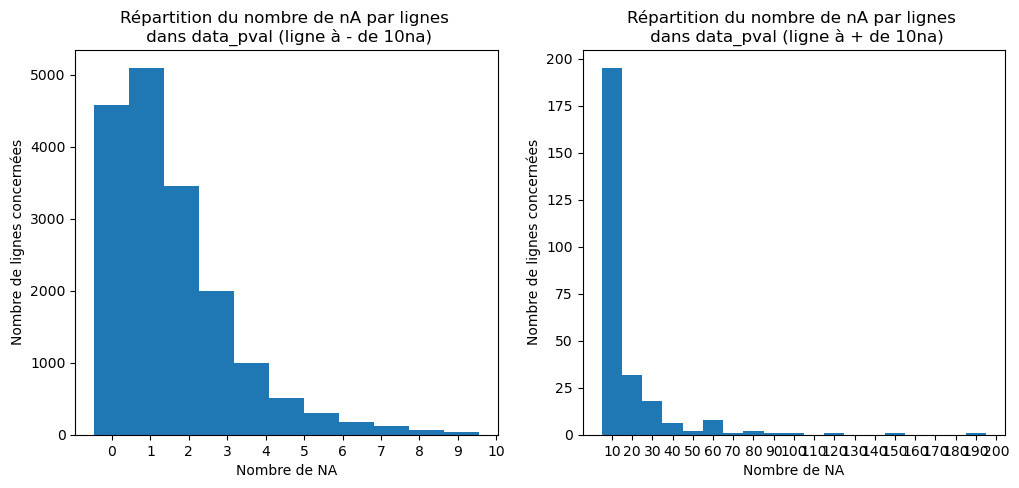

In [11]:
plt.figure(figsize=(12,5))
na_pval_lignesinf10 = na_pval_lignes[na_pval_lignes<=10]
plt.subplot(1,2,1)
plt.hist(na_pval_lignesinf10, bins=11, range=(0,10), align='left')
plt.xticks(np.arange(0,11,1))
plt.title("Répartition du nombre de nA par lignes \n dans data_pval (ligne à - de 10na)")
plt.xlabel("Nombre de NA")
plt.ylabel("Nombre de lignes concernées")

na_pval_lignessup10 = na_pval_lignes[na_pval_lignes>=10]
plt.subplot(1,2,2)
plt.hist(na_pval_lignessup10, bins=19, range=(10,200), align='left')
plt.xticks(np.arange(10,210,10))
plt.title("Répartition du nombre de nA par lignes \n dans data_pval (ligne à + de 10na)")
plt.xlabel("Nombre de NA")
plt.ylabel("Nombre de lignes concernées")

Dans data_pval, grande majorité des lignes présentent un nombre faible de na mais quelques unes en présentent beaucoup, (certaines entre 100 et 200), on les éliminera donc au traitement. La gestion des na dans le cadre de pvalues semble compliquée => en effet on ne peut pas estimer par la moyenne l'expression du gène. 

Méthode : 
- on va regarder si corrélation entre pvalue et log-ratio peut nous permettre d'estimer quelles pvalues sont suceptibles d'être en dessous ou au dessus de 0.05

### Relation entre pvalue et logratio pour estimer les p-values manquantes. 

On commence arbitrairement par étudier la relation entre logratio et pvalue pour les valeurs dans le premier stress 

#### Etude graphique

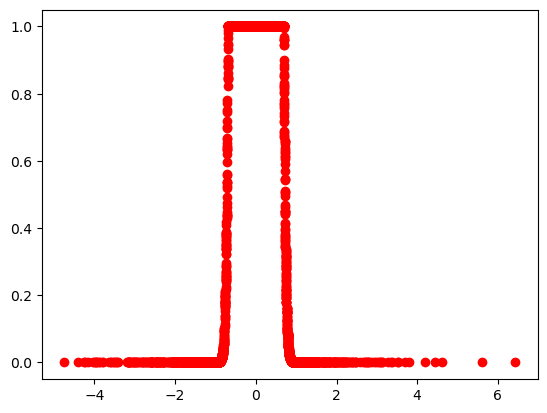

In [12]:
plt.figure()
plt.scatter(x=data_logratio.iloc[:,2], y=data_pval.iloc[:,2], c='red')

Exactement ce qu'on attendait ! les valeurs de log-ratio extrêmes sont associées à des pvalues faible. On peut donc peut être proposer une estimation des pvalues manquantes à partir des logratio associés puisque il n'y a presque pas de na dans les données de logratio. 
On va juste regarder si les p-values manquantes ne sont pas concentrées sur les points de rupture de la courbe du dessus, sinon ça pourrait compromettre leur estimation. 

In [13]:
#récup des logratios associés aux pvalues de la première valeur
indice_na_pval_colonne2 = data_pval.iloc[:,2].isna() #indice des na dans la colonne 2 de pval
log_na_pval =  data_logratio.iloc[:,2][indice_na_pval_colonne2] #logratios correspondants aux na dans la colonne 2 de pval
print(log_na_pval[:10])

#plt.figure()
#plt.scatter(x=data_logratio.iloc[:,2], y=data_pval.iloc[:,2], c='red')


Unnamed: 0
AT2G22540    0.4658
AT3G19360   -0.0526
AT1G60200    0.8603
AT2G43130    0.7237
AT5G43760   -0.7112
AT3G16640    0.6952
AT5G67500   -0.4605
AT3G15480   -0.1197
AT1G73870    2.1536
AT1G08880   -0.8391
Name: 29, dtype: float64


C'est ok, les logratios associés aux pvalues manquantes (toujours que pour la colonne 2) sont bien répartis entre autour de 0, là ou les pvalues sont toutes égales à 1. 

#### Proposition et évaluation d'un algo d'estimation des pvalues manquantes. 
On entraine l'algo sur les données de la colonne 2 encore, (puis on verra si ça marche bien partout après)

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X, y = data_logratio.iloc[np.where(~data_pval.iloc[:,1].isna() & ~data_logratio.iloc[:,1].isna())[0], 1], data_pval.iloc[np.where(~data_pval.iloc[:,1].isna() & ~data_logratio.iloc[:,1].isna())[0], 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test = X_train.to_numpy().reshape(-1, 1), X_test.to_numpy().reshape(-1, 1)


mod = DecisionTreeRegressor()
mod.fit(X_train, y_train)
yhat = mod.predict(X_test)
MAPE = mean_squared_error(y_test, yhat)

print("MAPE :", MAPE)

MAPE : 3.1400155628566492e-06


Donc ça marche super bien ! On va maintenant le tester sur les autres colonnes pour voir si le même algo marche pour d'autres types de stress

In [15]:
print(data_pval.iloc[:,0])

Unnamed: 0
AT3G32130    1.0
AT5G53730    1.0
AT2G19210    1.0
AT1G07530    1.0
AT1G03190    1.0
            ... 
AT1G30640    1.0
AT1G04440    1.0
AT3G33009    1.0
AT3G19323    1.0
AT2G17280    1.0
Name: 1101, Length: 17543, dtype: float64


In [16]:
L_mape_colonnes = []
for k in range(data_pval.shape[1]): 
    X_test = data_logratio.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    X_test = X_test.to_numpy().reshape(-1, 1)
    y_test = data_pval.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    yhat = mod.predict(X_test)
    L_mape_colonnes.append(mean_squared_error(y_test, yhat))

<BarContainer object of 387 artists>

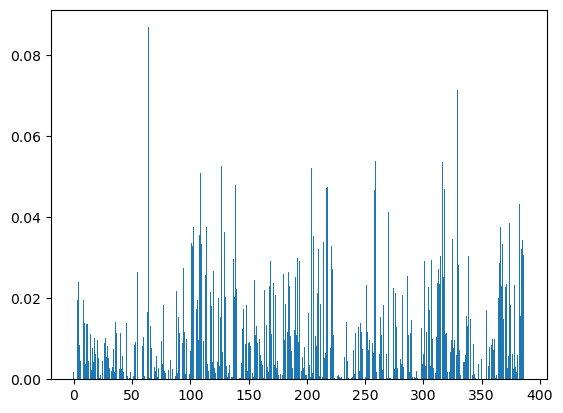

In [17]:
plt.figure()
plt.bar(np.arange(data_pval.shape[1]), L_mape_colonnes)

Ici MSE faibles mais hétérogènes, donc on va peut être refaire un algo à chaque colonne.

In [18]:
L_mape_colonnes2 = []
for k in range(data_pval.shape[1]): 
    #def des variables
    X = data_logratio.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    y = data_pval.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_train, X_test = X_train.to_numpy().reshape(-1, 1), X_test.to_numpy().reshape(-1, 1)
    #entrainement des modèles et stockage performances
    mod = DecisionTreeRegressor()
    mod.fit(X_train, y_train)
    yhat = mod.predict(X_test)
    L_mape_colonnes2.append(mean_squared_error(y_test, yhat))


<BarContainer object of 387 artists>

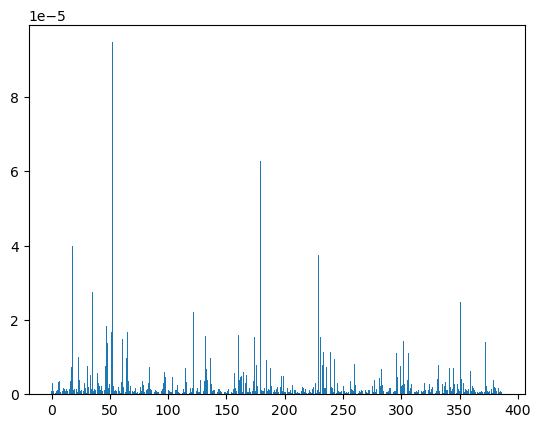

In [19]:
plt.figure()
plt.bar(np.arange(data_pval.shape[1]), L_mape_colonnes2)

Maintenant erreur vraiment hyper faible. On peut se permettre de prédire les na dans pvalues

In [20]:
data_pval_naestim = data_pval # nouveau jeu de données ou on va remplacer na par estimations
for k in range(data_pval.shape[1]): 
    #def des variables
    X = data_logratio.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    y = data_pval.iloc[np.where(~data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    X_pred = data_logratio.iloc[np.where(data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]
    X= X.to_numpy().reshape(-1, 1)
    X_pred = X_pred.to_numpy().reshape(-1, 1)
    mod = DecisionTreeRegressor()
    mod.fit(X,y)
    pval_pred = mod.predict(X_pred)
    data_pval_naestim.iloc[np.where(data_pval.iloc[:,k].isna() & ~data_logratio.iloc[:,k].isna())[0],k]=pval_pred

In [21]:
nombre_na_pval_naestim = data_pval_naestim.isna().values.sum() 
print(nombre_na_pval_naestim)

523


On a bien 523 NA comme dans data logratio, donc tout va bien !

#### Suppression des dernières na

On supprime les lignes contenant des NA (523 suppressions au maximum sur 17543 lignes, donc impact négligeable)

In [ ]:
logratio_clean = data_logratio.dropna(axis = 0)
pval_clean = data_pval_naestim.dropna(axis = 0)

# vérifications finales : 
print("nombre de na dans logratio_clean : ", logratio_clean.isna().values.sum())
print("nombre de na dans pval_clean : ", pval_clean.isna().values.sum())
print("Dimensions de logratio_clean : ", logratio_clean.shape)
print("Dimensions de pval_clean : ", pval_clean.shape)

nombre de na dans logratio_clean :  0
nombre de na dans pval_clean :  0
Dimensions de logratio_clean :  (17219, 387)
Dimensions de pval_clean :  (17219, 387)


## Classification des données d'expression en -1, 0, 1
On veut simplifier les données de sous/surexpression. Nouveau jeu de données aux mêmes dimensions que logratio_clean et pval_clean : 

- -1 : pvalue <0.05 et logratio négatif
- 1 : pvalue <0.05 et logratio positif
- 0 sinon

In [ ]:
#ATTENTION : Algo un peu long à faire tourner...  csv disponible dans une cellule en dessous
data_expression_clean = logratio_clean.copy()
for i in range(data_expression_clean.shape[0]):
    for j in range(data_expression_clean.shape[1]):
        if logratio_clean.iloc[i,j]<=0 and pval_clean.iloc[i,j]<0.05:
            data_expression_clean.iloc[i,j] = int(-1)
        elif logratio_clean.iloc[i,j]>=0 and pval_clean.iloc[i,j]<0.05:
            data_expression_clean.iloc[i,j] = int(1)
        else : 
            data_expression_clean.iloc[i,j] = int(0)

In [ ]:
data_expression_clean.index = logratio_clean.index.copy()

In [ ]:
csv = data_expression_clean.to_csv(r'/Users/martinsimonoviez/Desktop/IODAA/cours/Projet_fil_rouge/expression_classifiee.csv', index=True)

OSError: Cannot save file into a non-existent directory: '\Users\martinsimonoviez\Desktop\IODAA\cours\Projet_fil_rouge'

In [ ]:
#Pour prendre le fichier csv directement: 
data_expression_clean = pd.read_csv("/Users/martinsimonoviez/Desktop/IODAA/cours/Projet_fil_rouge/expression_classifiee.csv", sep=",")

In [ ]:
print(np.unique(data_expression_clean))
print(data_expression_clean.shape)

[-1.  0.  1.]
(17219, 387)


Tout a l'air bon ! On pourrait passer en sparse

## Sélection des gènes communs aux 2 datasets. 

Comme nous allons étudions le lien entre présence de PLM et expression génétique, nous allons devoir sélectionner seulement les gènes présents dans data_PLM et data_expression_clean. 

In [ ]:
#Combien de gènes dans les deux tableaux ? 
print("Nombre de gènes dans data_PLM : ", data_PLM.shape[0])
print("Nombre de gènes dans data_expression_clean : ", data_expression_clean.shape[0])

Nombre de gènes dans data_PLM :  13854
Nombre de gènes dans data_expression_clean :  17219


In [ ]:
#est ce que data_PLM contient quand même des gènes que data_expression_clean ne contient pas ? 
print("Nombre de gènes non propres à data_PLM : ",list(data_PLM.index.isin(data_expression_clean.index)).count(False))

Nombre de gènes non propres à data_PLM :  3085


Même si data_PLM est plus petit, il contient 3085 gènes non répertoriés dans data_expression_clean. Nous allons donc procéder en 2 étapes pour garder seulement les éléments en commun aux deux dataframes : 
- Data_PLM_final :  Suppression des gènes de data_PLM non répertoriés dans data_expression_clean
- Data_expression_final : Suppression des gènes de data_expression non répertoriés dans data_PLM_final

In [ ]:
#Création de data_PLM_final : 
data_PLM_final = data_PLM.loc[data_PLM.index.isin(data_expression_clean.index),:]
#Creation de data_expression_final
data_expression_final = data_expression_clean.loc[data_expression_clean.index.isin(data_PLM_final.index),:]

#Vérifications des dimensions : 
print("Dimensions de data_PLM_final : ", data_PLM_final.shape)
print("Dimensions de data_expression_final : ", data_expression_final.shape)

#Vérification des premiers éléments : 
print("5 premiers gènes de data_PLM_final : ", data_PLM_final.index[:5])
print("5 premiers gènes de data_expression_final : ", data_PLM_final.index[:5])

#vérification comme quoi index sont bien identiques et triés pareils
print("index identiques : ", np.unique(data_PLM_final.index==data_expression_final.index))

#apparement pas trié pareil... On trie 
data_PLM_final=data_PLM_final.sort_index(axis=0)
data_expression_final=data_expression_final.sort_index(axis=0)

#revérification comme quoi index sont bien identiques et triés pareils
print("index identiques : ",np.unique(data_PLM_final.index==data_expression_final.index))

Dimensions de data_PLM_final :  (10769, 178)
Dimensions de data_expression_final :  (10769, 387)
5 premiers gènes de data_PLM_final :  Index(['AT5G09440', 'AT5G59570', 'AT3G16140', 'AT5G64430', 'AT5G47550'], dtype='object')
5 premiers gènes de data_expression_final :  Index(['AT5G09440', 'AT5G59570', 'AT3G16140', 'AT5G64430', 'AT5G47550'], dtype='object')
index identiques :  [False]
index identiques :  [ True]


In [ ]:
#Création des csv associés, expression_final.csv et PLM_final.csv
data_expression_final.to_csv(r'data/expression_final.csv', index=True)
data_PLM_final.to_csv(r'data/PLM_final.csv', index=True)